In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
stocks = pd.read_csv('data/5_stocks.csv', parse_dates = ['Date'], index_col = 'Date')

In [3]:
stocks.tail()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2017-05-24,153.34,980.35,152.51,78.15,82.29
2017-05-25,153.87,993.38,153.20,78.31,81.75
2017-05-26,153.61,995.78,152.49,78.13,81.55
2017-05-30,153.67,996.70,151.73,78.15,81.10
2017-05-31,152.76,994.62,152.63,78.60,80.50


In [4]:
stocks.iloc[1]

AAPL      1.57
AMZN     15.27
IBM     106.50
WMT      47.34
XOM      43.40
Name: 2001-07-06 00:00:00, dtype: float64

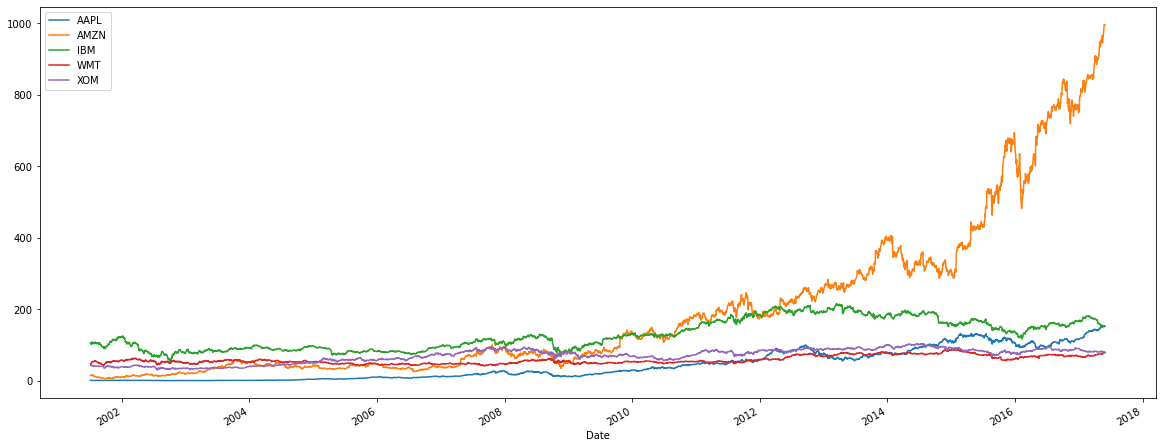

In [5]:
plt.rcParams["figure.figsize"] = (20,8)
stocks.plot()

In [6]:
start_price = stocks.iloc[1]

In [7]:
normalize = stocks.div(start_price).mul(100)

In [8]:
index = pd.read_csv('data/sp500.csv', parse_dates=['date'], index_col='date')

In [9]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [10]:
index.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [11]:
stocks_main = pd.concat([stocks, index], axis=1).dropna()

In [12]:
stocks_main.tail()

,AAPL,AMZN,IBM,WMT,XOM,SP500
2016-12-23,116.52,760.59,166.71,69.54,90.71,2263.79
2016-12-27,117.26,771.40,167.14,69.70,90.75,2268.88
2016-12-28,116.76,772.13,166.19,69.31,90.30,2249.92
2016-12-29,116.73,765.15,166.60,69.26,90.35,2249.26
2016-12-30,115.82,749.87,165.99,69.12,90.26,2238.83


In [13]:
stocks_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2007-06-29 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2394 non-null   float64
 1   AMZN    2394 non-null   float64
 2   IBM     2394 non-null   float64
 3   WMT     2394 non-null   float64
 4   XOM     2394 non-null   float64
 5   SP500   2394 non-null   float64
dtypes: float64(6)
memory usage: 130.9 KB


In [14]:
norm = stocks_main.div(stocks_main.iloc[0]).mul(100)

In [15]:
diff = norm[['AAPL', 'AMZN', 'XOM', 'WMT', 'IBM' ]].sub(norm['SP500'],axis=0)

In [16]:
diff.head()

,AAPL,AMZN,XOM,WMT,IBM
2007-06-29,0.000000,0.000000,0.000000,0.000000,0.000000
2007-07-02,-1.700707,0.684518,0.051037,-0.612326,-1.297640
2007-07-03,2.814084,0.088776,0.332956,-0.683185,-0.167812
2007-07-05,7.311245,-0.998956,0.059265,-1.508296,1.193608
2007-07-06,6.631759,-0.983382,1.273847,-1.219976,1.789473


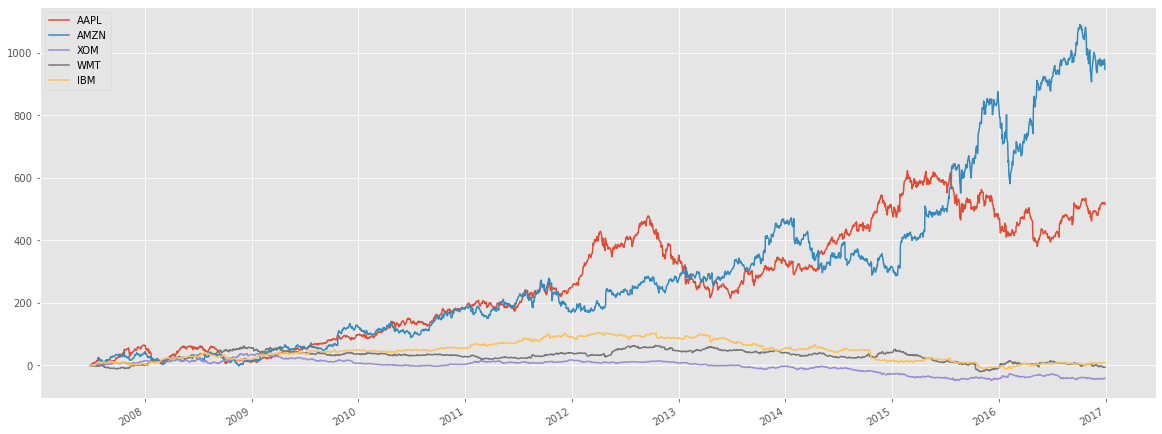

In [17]:

plt.style.use('ggplot')
diff.plot()

In [18]:
google = pd.read_csv('data/google.csv', parse_dates=['Date'], index_col='Date')

In [19]:
role = google.rolling('360D')

In [20]:
q25=role.quantile(0.25).add_suffix('_q25')
median = role.median().add_suffix('_median')
q75 = role.quantile(0.75).add_suffix('_q75')


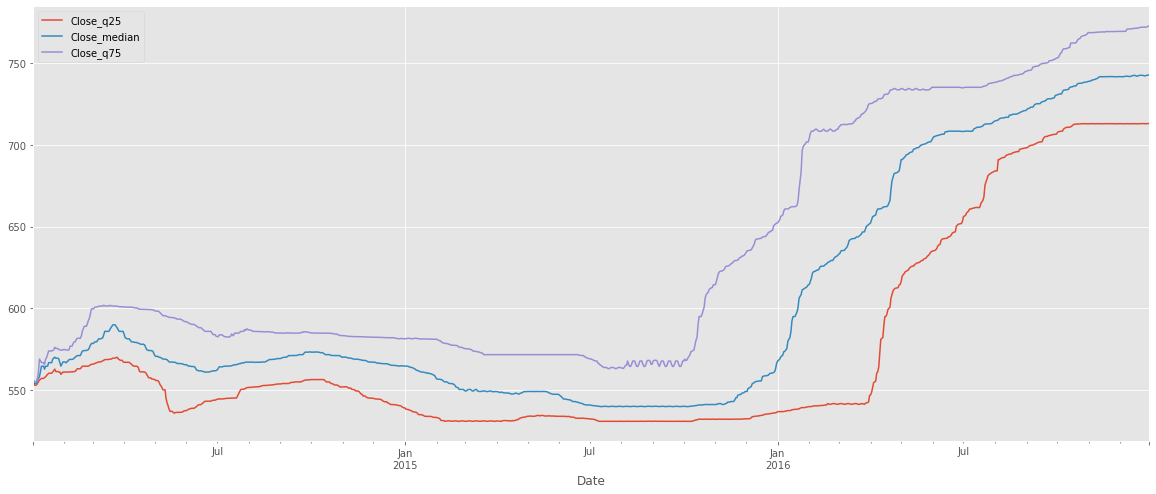

In [21]:
pd.concat([q25,median,q75], axis=1).plot()

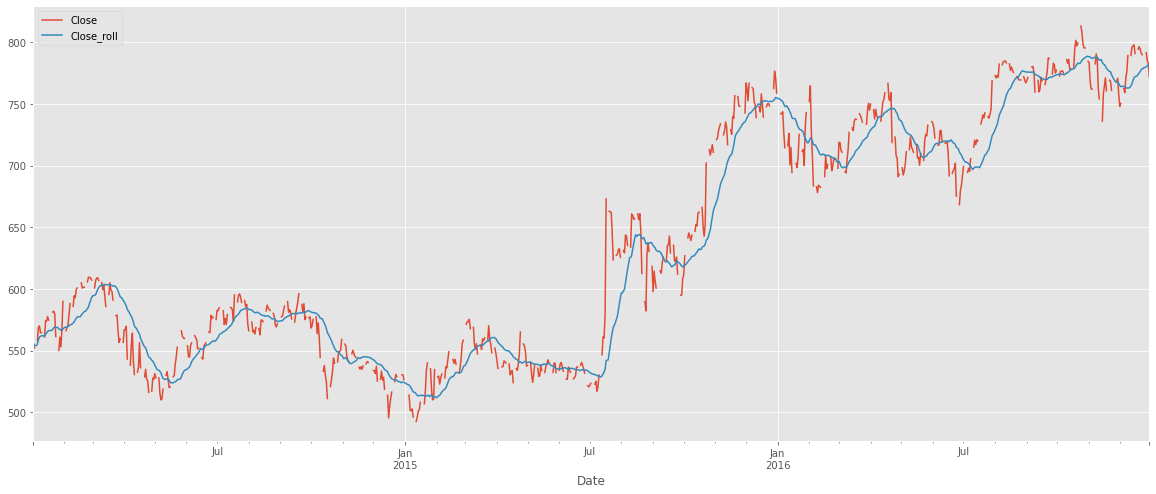

In [22]:
rr = google.rolling('30D').mean()
google.join(rr.add_suffix('_roll')).plot()